In [1]:
import numpy as np
np.set_printoptions(threshold=50)
from datascience import *


%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Charts

In [2]:
#data = 'http://inferentialthinking.com/notebooks/actors.csv'

#ordered by the total gross of all movies that have an actor in it
#in millions
data = 'actors.csv'
actors = Table.read_table(data)
actors

Actor              | Total Gross | Number of Movies | Average per Movie | #1 Movie                     | Gross
Harrison Ford      | 4871.7      | 41               | 118.8             | Star Wars: The Force Awakens | 936.7
Samuel L. Jackson  | 4772.8      | 69               | 69.2              | The Avengers                 | 623.4
Morgan Freeman     | 4468.3      | 61               | 73.3              | The Dark Knight              | 534.9
Tom Hanks          | 4340.8      | 44               | 98.7              | Toy Story 3                  | 415
Robert Downey, Jr. | 3947.3      | 53               | 74.5              | The Avengers                 | 623.4
Eddie Murphy       | 3810.4      | 38               | 100.3             | Shrek 2                      | 441.2
Tom Cruise         | 3587.2      | 36               | 99.6              | War of the Worlds            | 234.3
Johnny Depp        | 3368.6      | 45               | 74.9              | Dead Man's Chest             | 423.3
Michael Caine      | 3351.5      | 58               | 57.8              | The Dark Knight              | 534.9
Scarlett Johansson | 3341.2      | 37               | 90.3              | The Avengers                 | 623.4
... (40 rows omitted)

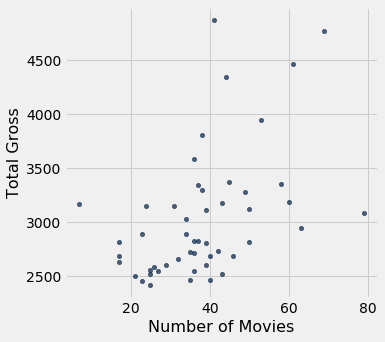

In [3]:
#relationship between the number of movies and total
#amount of money that they made
#scatter plot: ( column for x-axis, column for y-axis)

actors.scatter('Number of Movies', 'Total Gross')

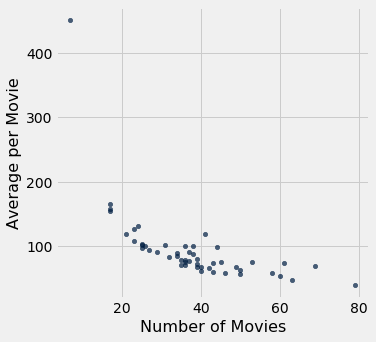

In [4]:
#average per movie
actors.scatter('Number of Movies', 'Average per Movie')

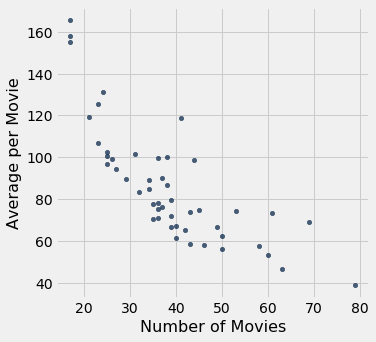

In [5]:
#zoom in
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [6]:
#who is this person at the very far right? How can you find him/her?





















actors.where('Number of Movies', are.above(75))

Actor         | Total Gross | Number of Movies | Average per Movie | #1 Movie         | Gross
Robert DeNiro | 3081.3      | 79               | 39                | Meet the Fockers | 279.3

In [7]:
#finally who made less than 10 moves but a lot of money? Could you guess?












actors.where('Number of Movies', are.below(10))

Actor           | Total Gross | Number of Movies | Average per Movie | #1 Movie                     | Gross
Anthony Daniels | 3162.9      | 7                | 451.8             | Star Wars: The Force Awakens | 936.7

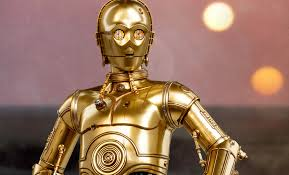

In [8]:
from IPython.display import Image
Image("actor.jpeg", width=600)

In [9]:
#data = 'http://inferentialthinking.com/notebooks/movies_by_year.csv'
#more movie data
data = 'movies_by_year.csv'
movies = Table.read_table(data)
movies

Year | Total Gross | Number of Movies | #1 Movie
2015 | 11128.5     | 702              | Star Wars: The Force Awakens
2014 | 10360.8     | 702              | American Sniper
2013 | 10923.6     | 688              | Catching Fire
2012 | 10837.4     | 667              | The Avengers
2011 | 10174.3     | 602              | Harry Potter / Deathly Hallows (P2)
2010 | 10565.6     | 536              | Toy Story 3
2009 | 10595.5     | 521              | Avatar
2008 | 9630.7      | 608              | The Dark Knight
2007 | 9663.8      | 631              | Spider-Man 3
2006 | 9209.5      | 608              | Dead Man's Chest
... (26 rows omitted)

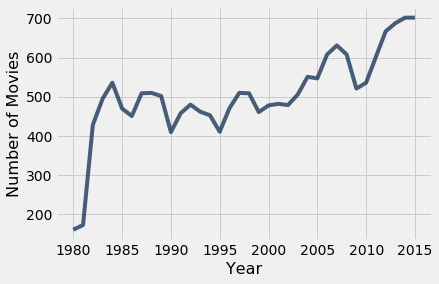

In [10]:
#Line plot
movies.plot('Year', 'Number of Movies') #change to .scatter

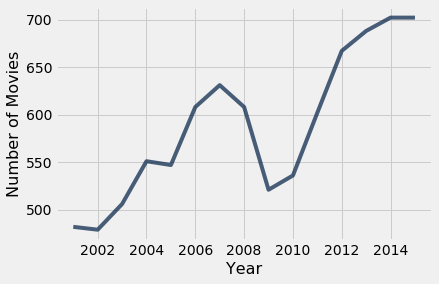

In [11]:
#number of movies after 2000
#change the data and re-plot it. How?









century_21 = movies.where('Year', are.above(2000))
#century_21
century_21.plot('Year', 'Number of Movies')

#why the dip?

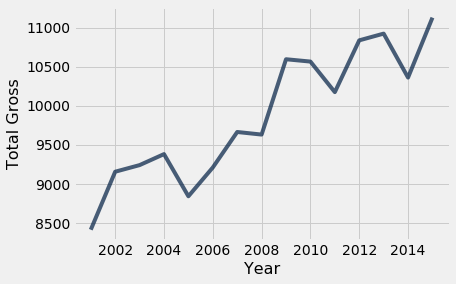

In [12]:
#change in total gross over time
#did the studios suffer?
century_21.plot('Year', 'Total Gross')

In [13]:
century_21.where('Year', are.equal_to(2009))

Year | Total Gross | Number of Movies | #1 Movie
2009 | 10595.5     | 521              | Avatar

back to slides

## Bar Charts

In [14]:
#data = 'http://inferentialthinking.com/notebooks/top_movies.csv'

data = 'top_movies.csv'
top = Table.read_table(data)
top

Title                                     | Studio               | Gross     | Gross (Adjusted) | Year
Star Wars: The Force Awakens              | Buena Vista (Disney) | 906723418 | 906723400        | 2015
Avatar                                    | Fox                  | 760507625 | 846120800        | 2009
Titanic                                   | Paramount            | 658672302 | 1178627900       | 1997
Jurassic World                            | Universal            | 652270625 | 687728000        | 2015
Marvel's The Avengers                     | Buena Vista (Disney) | 623357910 | 668866600        | 2012
The Dark Knight                           | Warner Bros.         | 534858444 | 647761600        | 2008
Star Wars: Episode I - The Phantom Menace | Fox                  | 474544677 | 785715000        | 1999
Star Wars                                 | Fox                  | 460998007 | 1549640500       | 1977
Avengers: Age of Ultron                   | Buena Vista (Disney) | 459005868 | 465684200        | 2015
The Dark Knight Rises                     | Warner Bros.         | 448139099 | 500961700        | 2012
... (190 rows omitted)

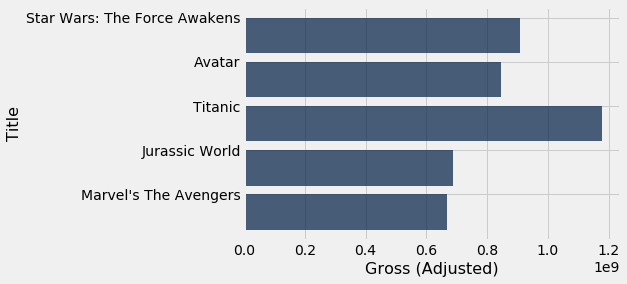

In [15]:
top5 = top.take(np.arange(5))
top5.barh('Title', 'Gross (Adjusted)')

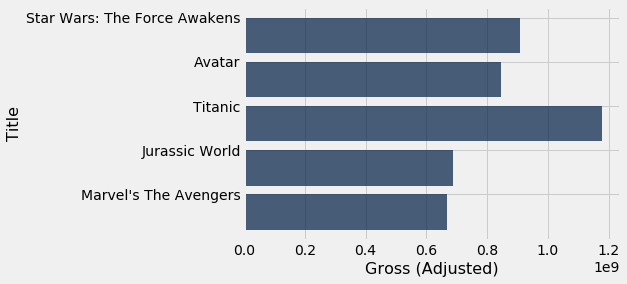

In [16]:
top5.barh(0, 3)

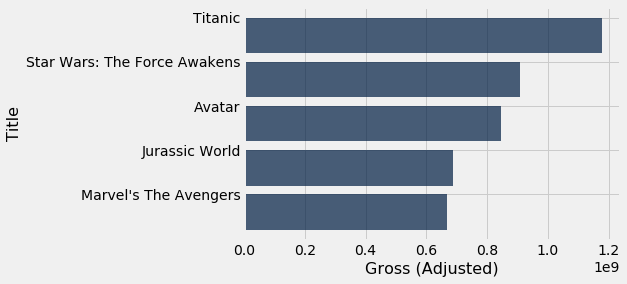

In [17]:
top5.sort(3, descending=True).barh(0, 3)

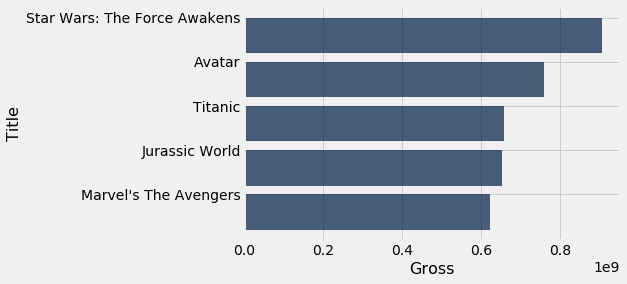

In [18]:
top5.select(0, 2).barh('Title')

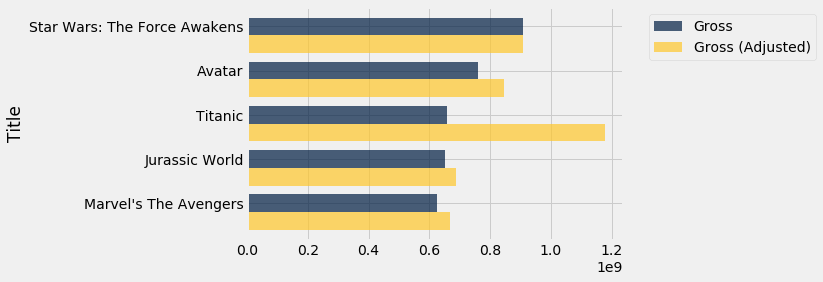

In [19]:
top5.select(0, 2, 3).barh('Title')

In [20]:
top5.barh('Title')

ValueError: The column 'Studio' contains non-numerical values. A plot cannot be drawn for this column.

## Bar Charts of Counts

In [21]:
#What if I want to count how many movies belong to Disney. How? 












#compute a distibution of categories
studios = top.group('Studio')
studios

Studio               | count
AVCO                 | 1
Buena Vista (Disney) | 29
Columbia             | 10
Disney               | 11
Dreamworks           | 3
Fox                  | 26
IFC                  | 1
Lionsgate            | 3
MGM                  | 7
MPC                  | 1
... (14 rows omitted)

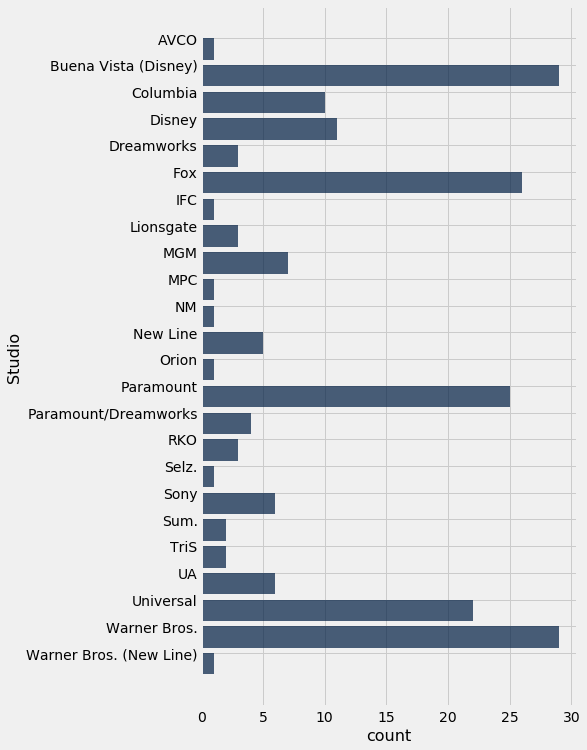

In [68]:
studios.barh('Studio')

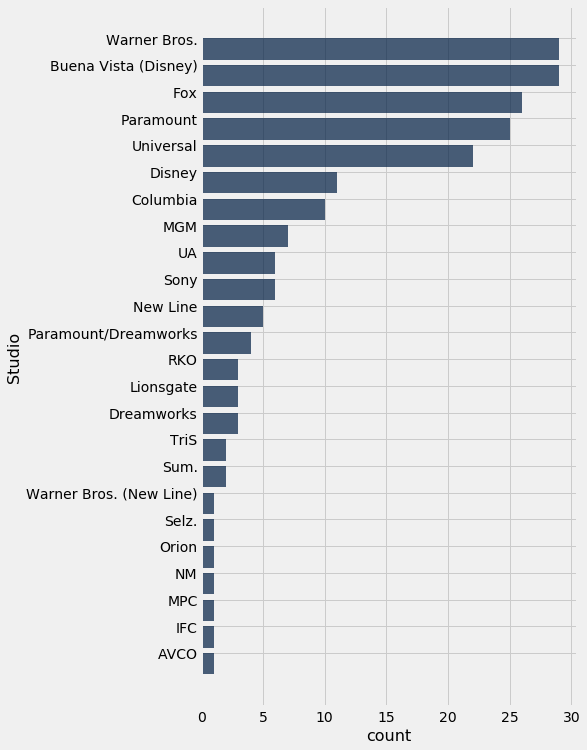

In [22]:
#sorting for easier comparison
studios.sort('count', descending=True).barh('Studio')

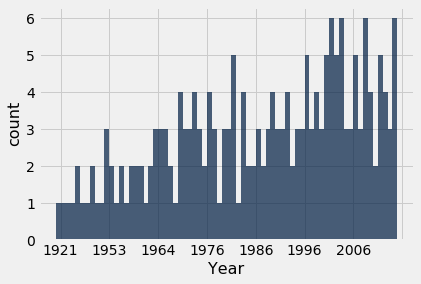

In [24]:
top.group('Year').barh('Year') #change barh to bar

## Discussion Question

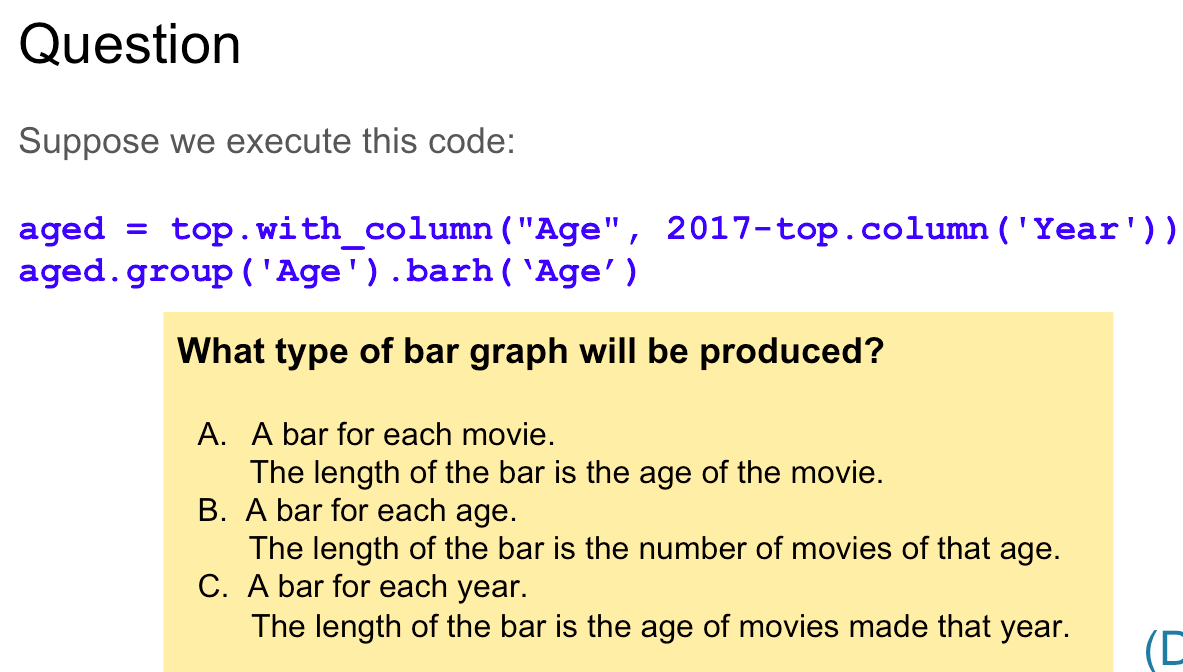

In [25]:
from IPython.display import Image
Image("q9.png", width=600)

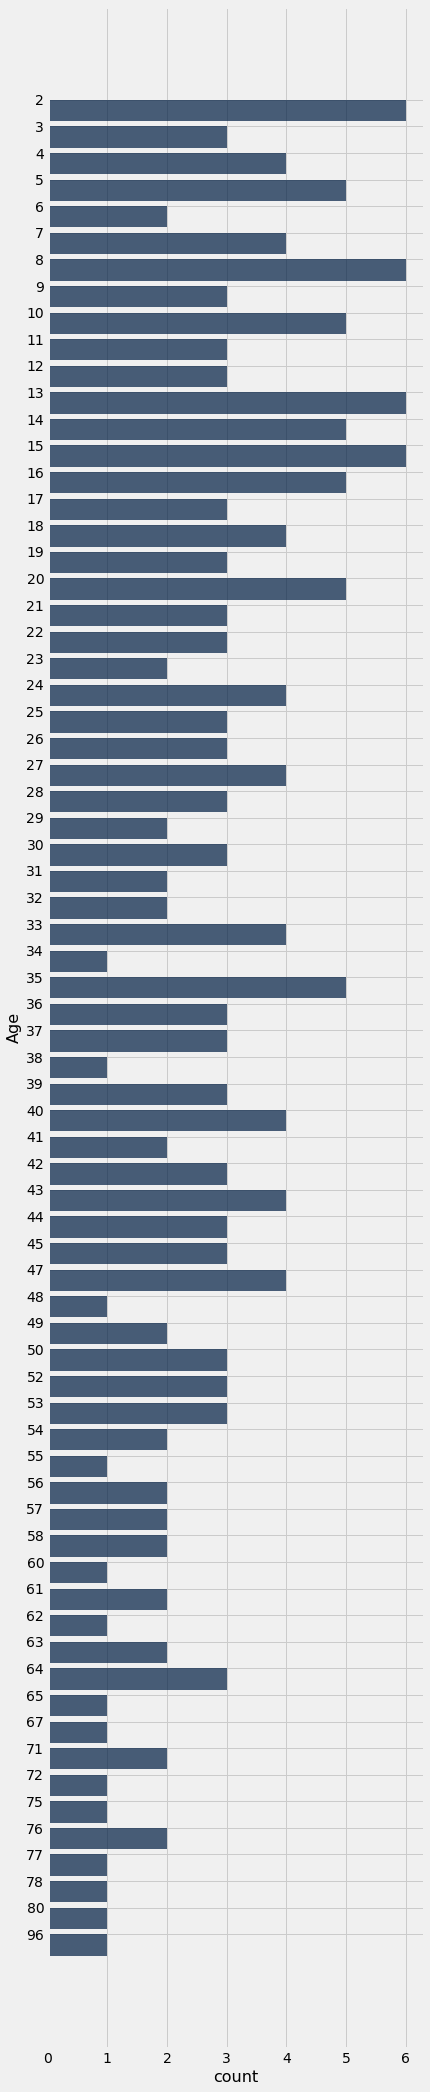

In [26]:
#Distribution of the ages.

aged = top.with_column("Age", 2017-top.column('Year'))
aged.group('Age').barh('Age')


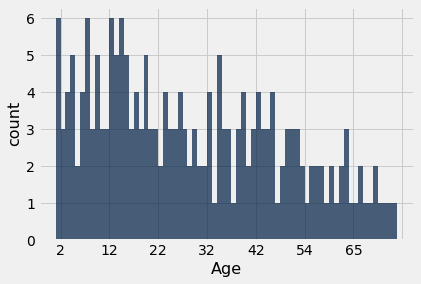

In [34]:
#might be easier to use vertical bars here
aged.group('Age').bar('Age')

##  Histograms


In [31]:
aged.group("Age")

Age  | count
96   | 1
80   | 1
78   | 1
77   | 1
76   | 2
75   | 1
72   | 1
71   | 2
67   | 1
65   | 1
... (60 rows omitted)

In [29]:
#bin them using column "Age"
aged.bin('Age').show()

#first row: bin contains all ages with 2 <= age < 11.4
#there are 41 values in this bin 
#default bins are ten evenly spaced bins: (96-2)/10 = 94/10 = 9.4 width
#the last row is not really a bin (always empty) - just shows you where the previous bin ends

In [35]:
#let's define our own bins
#inputs: (name of your bins, values for bounds)

aged.bin('Age', bins = make_array(0, 20, 40, 60, 80, 100))

bin  | Age count
0    | 76
20   | 59
40   | 44
60   | 19
80   | 2
100  | 0

In [37]:
#how can I use np.arange here to create the same table? 


























bounds = np.arange(0, 101, 20)
bounds

array([  0,  20,  40,  60,  80, 100])

In [38]:
aged.bin('Age', bins=bounds)

bin  | Age count
0    | 76
20   | 59
40   | 44
60   | 19
80   | 2
100  | 0

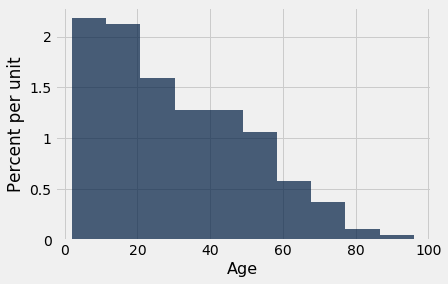

In [39]:
#ready for a histogram with the ten default bins
aged.hist('Age')

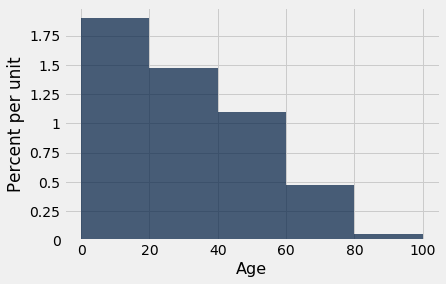

In [41]:
#arrange better, with our five custom bins
aged.hist('Age', bins=bounds) #bounds = np.arange(0, 101 , 20)

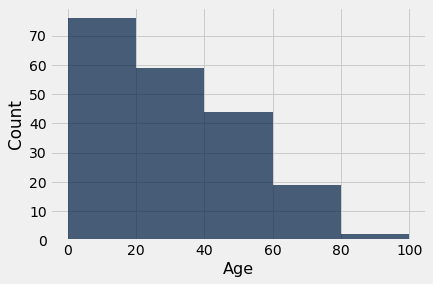

In [42]:
#change the vertical axis to make more sense
#why such a strange vertical axis by default?

aged.hist('Age', bins=bounds, normed=False)

## Combining Bins

### Question

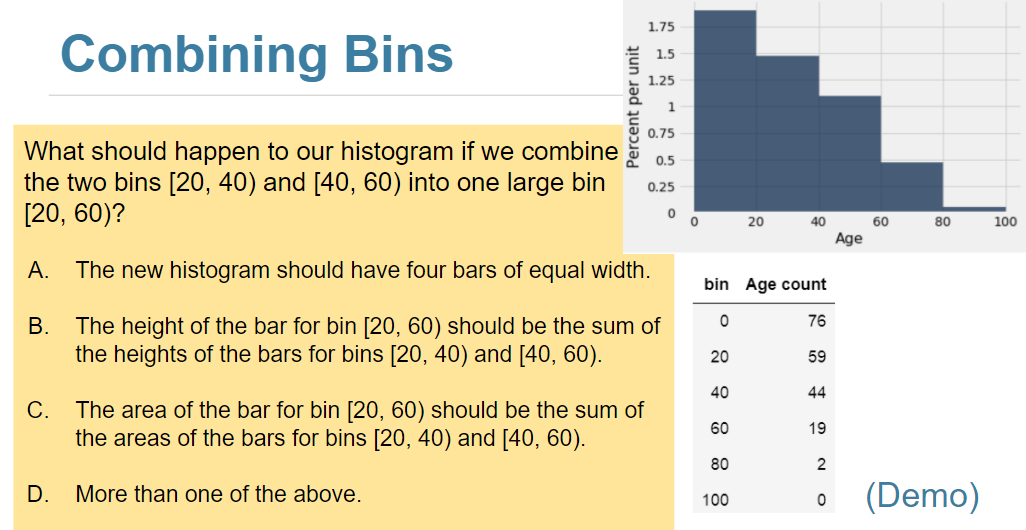

In [46]:
from IPython.display import Image
Image("q10.png", width=600)

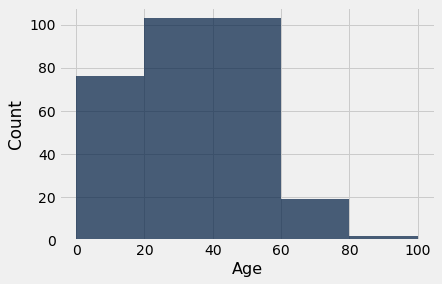

In [47]:
aged.hist('Age', bins=make_array(0, 20, 60, 80, 100), normed=False) #new bin has sum of heights of previous bins

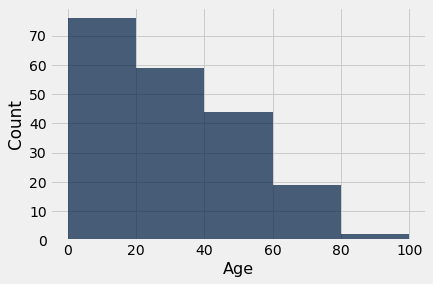

In [48]:
#compare with original distribution

aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

In [6]:
aged.hist('Age', bins=make_array(0, 20, 60, 80, 100), normed=True) #new bin has sum of areas of previous bins

NameError: name 'aged' is not defined

## Density


In [ ]:
# I want smaller bins
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year',  normed = False)

In [ ]:
#too much detail at the end
#can combine bins into bigger bins:

np.arange(0, 101, 5)

In [ ]:
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100], unit='year',  normed = False)

In [ ]:
#smooth out the last cell:

aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80, 100], unit='year',  normed = False)

In [ ]:
#60 - 80
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  45,  50,  55, 
                       60, 80, 100], unit='year',  normed = False)


In [ ]:
#40 - 60
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  60, 80, 100], unit='year',  normed = False)


# Why these bars look so much bigger now? I lost the shape of my distribution :(

In [ ]:
#why is this bar looks so much bigger now? Why did I loose the shape of my distribution? 
aged.bin("Age", bins = [0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  60, 80, 100])




















#area principle is violated! 

In [ ]:
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40, 100], unit='year',  normed = False)

In [ ]:
#what we will do instead: each bar area corresponds to an actual proportion  of % of the movies that
#fall into this bin.

aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  100], unit='year')

#the original shape of my distribution is back!

In [ ]:
#back to the slides


In [ ]:
aged.bin("Age", bins = [0,   5,  10,  15,  20,  25,  30,  
                       35,  40, 100]).show()

## Question

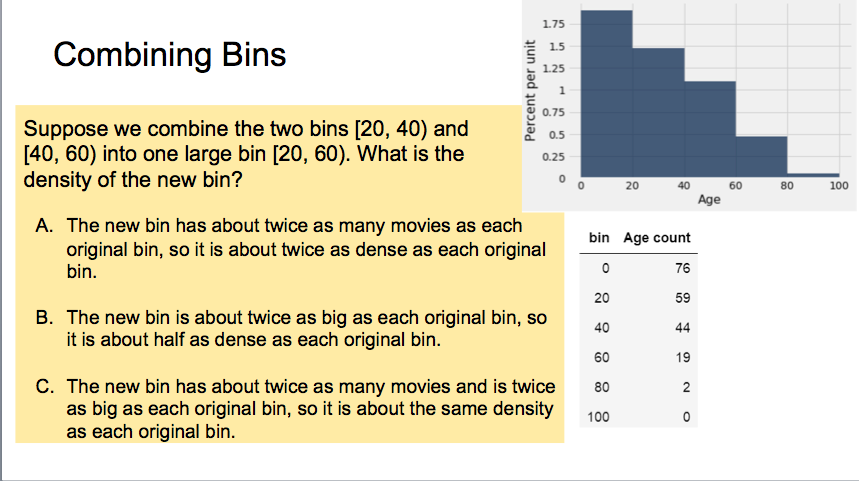

In [3]:
from IPython.display import Image
Image("q11.png", width=600)

In [ ]:
#d. question
aged.hist('Age', bins=make_array(0, 20, 40, 60, 80, 100), normed=True) #compare

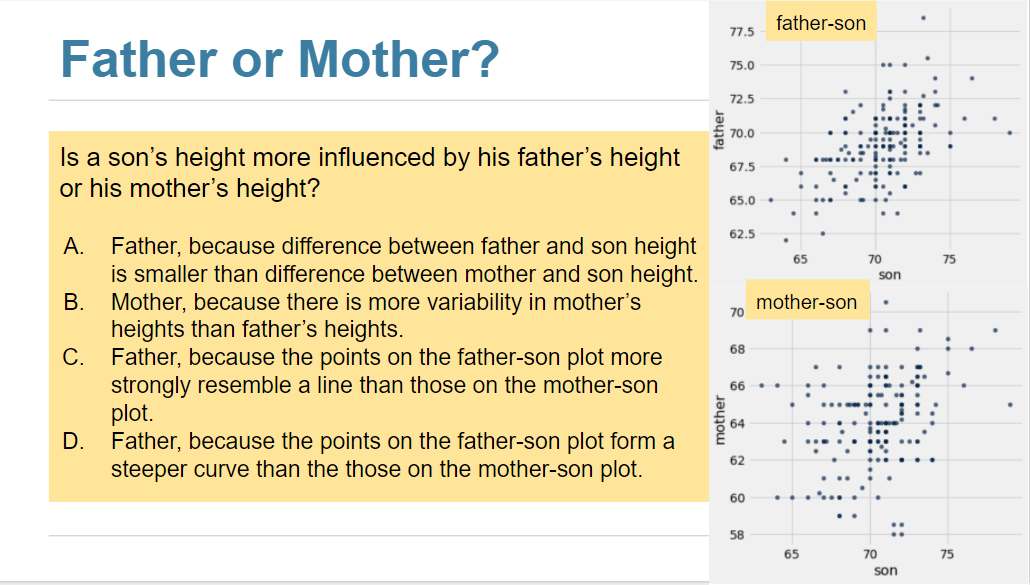

In [4]:
from IPython.display import Image
Image("q12.png", width=600)

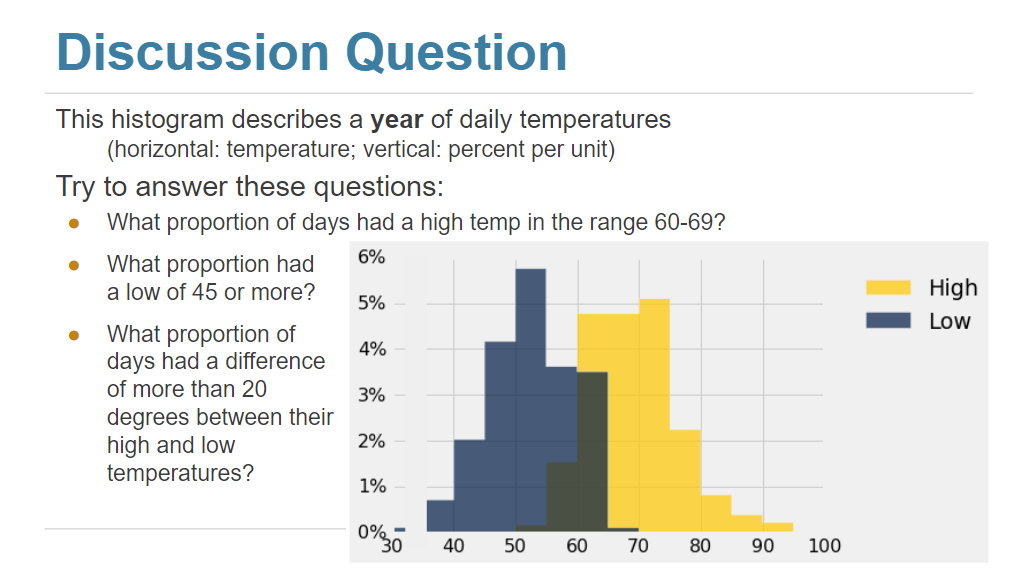

In [5]:
from IPython.display import Image
Image("q13.png", width=600)